In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
data = np.loadtxt('../data/fiji.txt')

# Problem 1a {-}

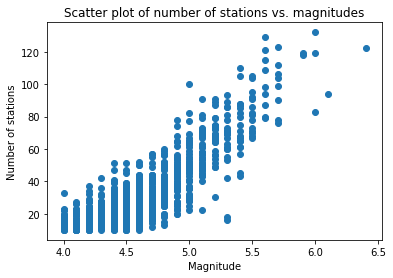

In [8]:
stations = data[:,5]
magnitudes = data[:,4]
plt.scatter(magnitudes, stations)
plt.title('Scatter plot of number of stations vs. magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Number of stations')
plt.show()

# Problem 1b {-}

In [20]:
n = len(data)

def compute_plugin_estimate(X, Y):
    # Compute each component separately

    muX = np.mean(X)
    muY = np.mean(Y)

    cov = 0

    for x in X:
        xDiff = x - muX
        for y in Y:
            cov += xDiff * (y - muY)

    cov /= n ** 2

    varX = sum((X - muX) ** 2) / n
    varY = sum((Y - muY) ** 2) / n

    return cov / ((varX * varY) ** (1 / 2))

thetaHat = compute_plugin_estimate(magnitudes, stations)

print('Plug-in estimate of theta = ', thetaHat)

Plug-in estimate of theta =  6.7086626842787235e-18


# Problem 1c {-}

In [29]:
B = 10 ** 3

estimates = np.zeros(B)

for i in range(B):
    row = np.random.choice(n, n, replace=True)
    X = data[row,4]
    Y = data[row,5]
    estimates[i] = compute_plugin_estimate(X, Y)
    
# Bootstrap estimate of standard error of theta hat
bootstrapMean = np.mean(estimates)
seHat = np.mean((estimates - bootstrapMean) ** 2) ** (1 / 2)
print('Bootstrap estimate of the standard error of theta hat = ', seHat)

Bootstrap estimate of the standard error of theta hat =  1.3237758811697228e-17


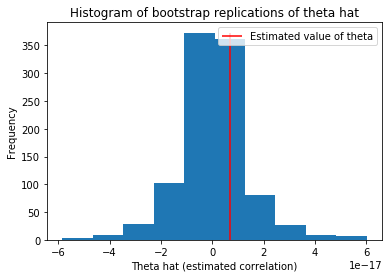

In [30]:
# Plot histogram
plt.hist(estimates)
plt.title('Histogram of bootstrap replications of theta hat')
plt.ylabel('Frequency')
plt.xlabel('Theta hat (estimated correlation)')
plt.vlines(thetaHat, 0, max(np.histogram(estimates)[0]), colors='r', label='Estimated value of theta')
plt.legend()
plt.show()

# Problem 1d {-}

In [36]:
# 0.025th quantile of standard normal distribution
z = norm.ppf(0.975)
a = thetaHat - z * seHat
b = thetaHat + z * seHat
print('Normal 95% confidence interval for theta = [{}, {}]'.format(a, b))

Normal 95% confidence interval for theta = [-1.9236867822675587e-17, 3.2654193191233034e-17]


In [34]:
# Using approximate pivot (theta Hat - theta)
a = 2 * thetaHat - np.quantile(estimates, 0.975)
b = 2 * thetaHat - np.quantile(estimates, 0.025)
print('Pivotal 95% confidence interval for theta = [{}, {}]'.format(a, b))

Pivotal 95% confidence interval for theta = [-1.5035483364270738e-17, 4.0110643455874414e-17]


# Problem 3b {-}

In [37]:
m = 10 ** 4
n = 10
a = 1
b = 3
mu = (a + b) / 2

# Estimated MSE of MLE of mu
mse = 0

for i in range(m):
    # Generate sample 
    sample = np.random.uniform(a, b, n)
    muMLE = (min(sample) + max(sample)) / 2
    mse += (muMLE - mu) ** 2
    
mse /= m
print('MSE of MLE of mu = ', mse)

MSE of MLE of mu =  0.014891088440386233


We can see that the MSE of MLE of mu (0.0149) is much lower than the MSE of plug-in estimate of mu (4.33).

# Problem 5b {-}

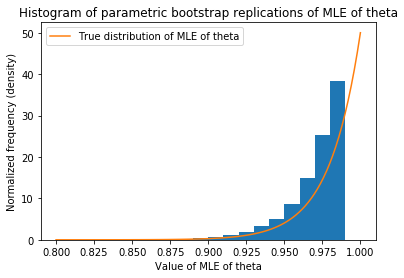

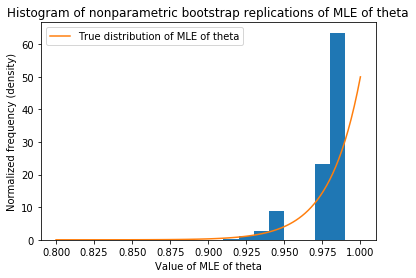

In [49]:
n = 50
theta = 1

# Create a sample
sample = np.random.uniform(0, theta, n)

# MLE of theta 
thetaHat = max(sample)

B = 10 ** 4

# Parametric and nonparametric bootstrap replications of MLE of theta
pReplications = []
npReplications = []

for i in range(B):
    # Create a parametric bootstrap replication
    bSample1 = np.random.uniform(0, thetaHat, n)
    pReplications.append(max(bSample1))
    
    # Create a nonparametric bootstrap replication
    bSample2 = np.random.choice(sample, n, replace=True)
    npReplications.append(max(bSample2))
    
X = np.linspace(0.8, 1, 100)

# Plot histogram of parametric bootstrap replications
plt.hist(pReplications, range=(0.8, 1), bins=20, density=True)
plt.plot(X, n * X ** (n - 1) / (theta ** n), label='True distribution of MLE of theta')
plt.title('Histogram of parametric bootstrap replications of MLE of theta')
plt.ylabel('Normalized frequency (density)')
plt.xlabel('Value of MLE of theta')
plt.legend()
plt.show()
    
# Plot histogram of nonparametric bootstrap replications
plt.hist(npReplications, range=(0.8, 1), bins=20, density=True)
plt.plot(X, n * X ** (n - 1) / (theta ** n), label='True distribution of MLE of theta')
plt.title('Histogram of nonparametric bootstrap replications of MLE of theta')
plt.ylabel('Normalized frequency (density)')
plt.xlabel('Value of MLE of theta')
plt.legend()
plt.show()

The true distribution of the MLE of theta from part a roughly follows the shape of the two histograms. We can see that the histogram of the parametric bootstrap replications more smoothly resembles to the true distribution, whereas the histogram of the nonparametric bootstrap replications is sparse (as our nonparametric bootstrap samples can only contain values in the original sample). We also see that the last bin is empty in both histograms, which is due to the fact that the probability of getting a data point value > 0.975 is low when theta is 1. Overall, the parametric bootstrap method seems to perform better than nonparametric as we see that it seems closer to the shape of the true distribution.